In [112]:
import pandas as pd
from matplotlib import pyplot

In [113]:
sales = pd.read_csv('Warehouse_and_Retail_Sales.csv')
sales.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [118]:
items = sales['ITEM TYPE'].unique().tolist()[:-1]

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_2146/3901920098.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine['Year - Month'] = dates
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_2146/3901920098.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine['Datetime'] = pd.to_datetime(wine['Year - Month'])
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_2146/3901920098.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

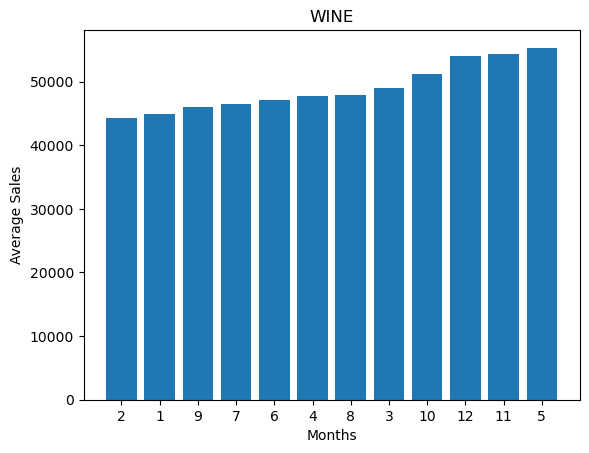

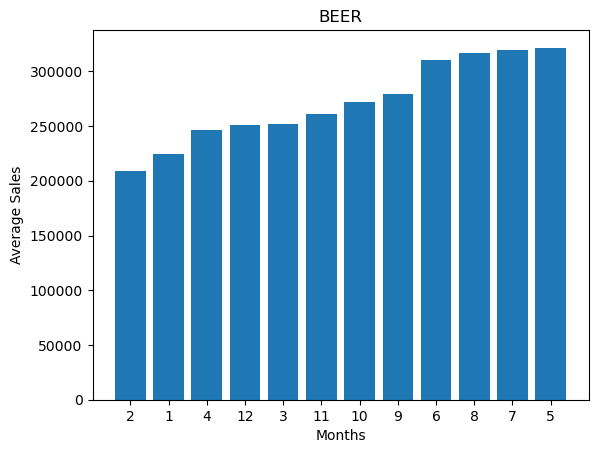

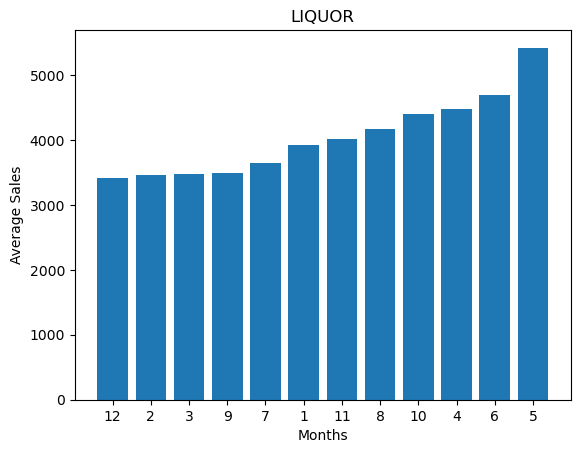

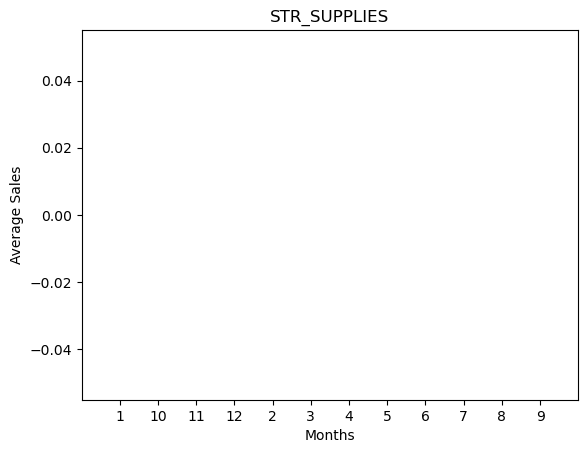

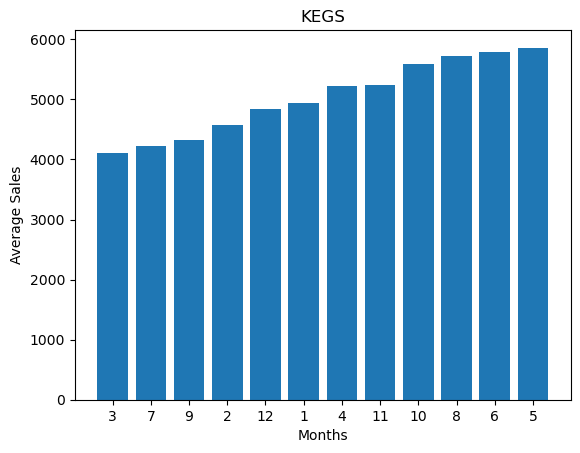

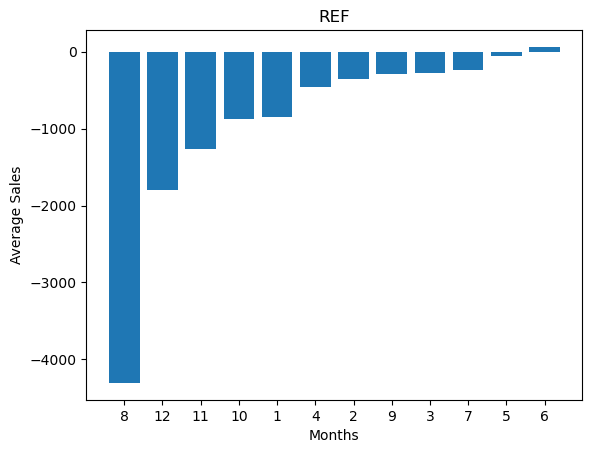

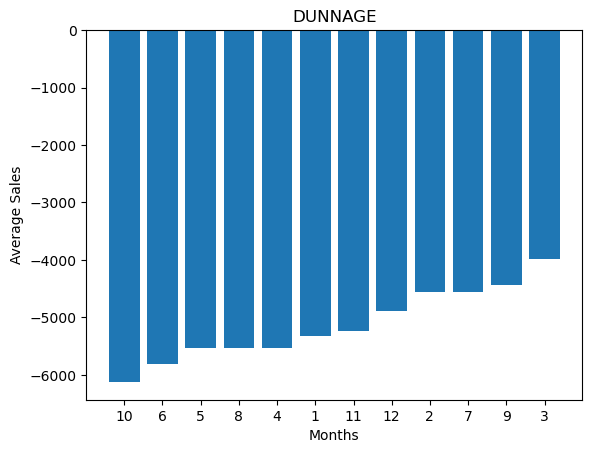

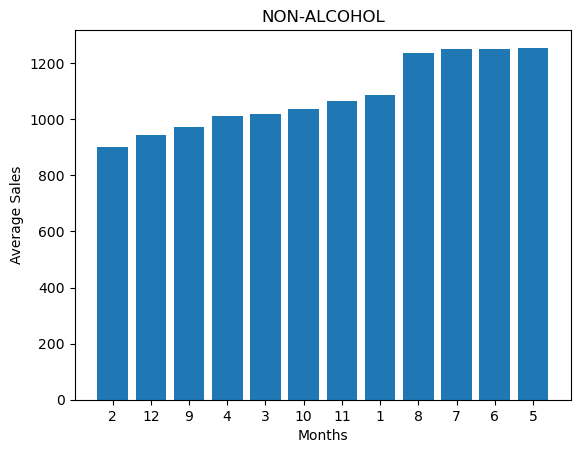

In [150]:
og_df = pd.DataFrame()

for item in items:
    
    sales = pd.read_csv('Warehouse_and_Retail_Sales.csv')

    dates = []

    wine = sales.loc[sales['ITEM TYPE'] == item]

    for row, i in wine.iterrows():
        date = f"{i['YEAR']}/{i['MONTH']}"

        dates.append(date)

    wine['Year - Month'] = dates

    wine['Datetime'] = pd.to_datetime(wine['Year - Month'])

    wine = wine.sort_values(by='Datetime')

    dates_ana = wine['Year - Month'].unique().tolist()

    sales = []

    for date in dates_ana:
        sales.append(wine.loc[wine['Year - Month'] == date]['WAREHOUSE SALES'].sum())

    sales_df = pd.DataFrame({f'Sales {item}': sales, 'Dates': dates_ana})

    sales_df['Month'] = sales_df['Dates'].apply(lambda x: x.split('/')[1])

    group = sales_df.groupby(by='Month').mean()

    group = group.sort_values(by=f'Sales {item}')
    
    if len(og_df) == 0:
        og_df = group
    else:
        og_df = pd.merge(og_df, group, on='Month')

    # Create the plot with ax.plt()
    fig, ax = plt.subplots()
    ax.bar(group.index, group[f'Sales {item}'])

    ax.set_xlabel('Months')
    ax.set_ylabel('Average Sales')

    ax.set_title(item)

    # Save the figure
    plt.savefig(f'{item}.png')

In [152]:
og_df['Month_Int'] = og_df.index.tolist()
og_df['Month_Int'] = og_df['Month_Int'].astype(int)


In [153]:
og_df = og_df.sort_values(by='Month_Int')

In [154]:
og_df

,Sales WINE,Sales BEER,Sales LIQUOR,Sales STR_SUPPLIES,Sales KEGS,Sales REF,Sales DUNNAGE,Sales NON-ALCOHOL,Month_Int
Month,,,,,,,,,
1,44955.526667,224274.793333,3916.013333,0.0,4946.000000,-843.666667,-5329.333333,1085.210,1
2,44249.480000,208534.280000,3459.090000,0.0,4578.000000,-360.500000,-4565.000000,902.750,2
3,49058.695000,251962.725000,3479.260000,0.0,4105.000000,-275.500000,-3991.000000,1017.670,3
4,47662.980000,246457.690000,4483.780000,0.0,5217.000000,-459.000000,-5533.000000,1011.420,4
5,55323.980000,321526.330000,5420.930000,0.0,5860.000000,-59.000000,-5536.000000,1255.340,5
6,47124.625000,309866.240000,4695.505000,0.0,5797.000000,62.000000,-5808.000000,1251.585,6
7,46536.070000,319122.946667,3643.200000,0.0,4226.666667,-243.666667,-4561.333333,1249.180,7
8,47840.800000,316772.935000,4170.925000,0.0,5715.000000,-4307.000000,-5534.000000,1236.230,8
9,46011.420000,279537.556667,3490.726667,0.0,4322.000000,-288.666667,-4433.000000,971.350,9


/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_2146/1972466258.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine['Year - Month'] = dates
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_2146/1972466258.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine['Datetime'] = pd.to_datetime(wine['Year - Month'])
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_2146/1972466258.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

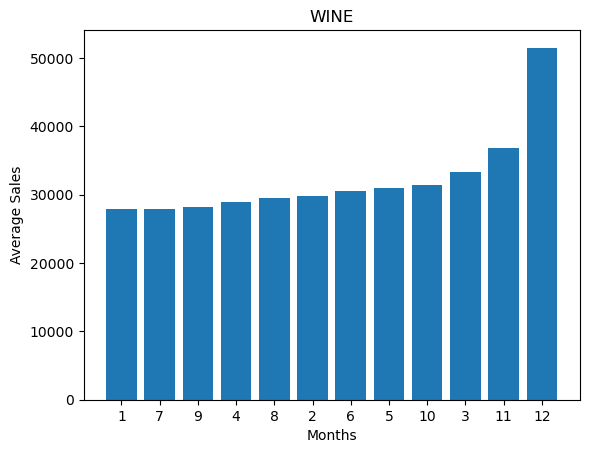

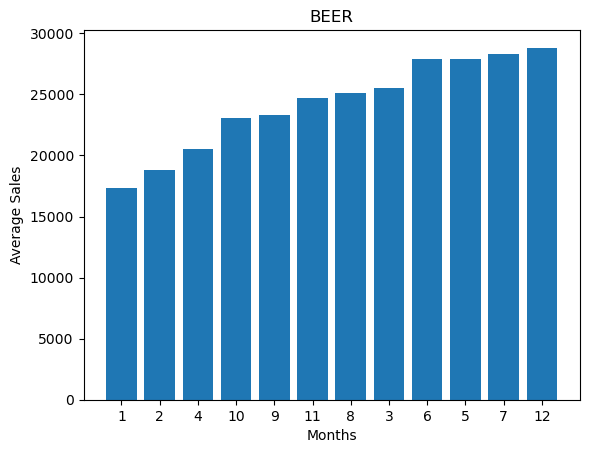

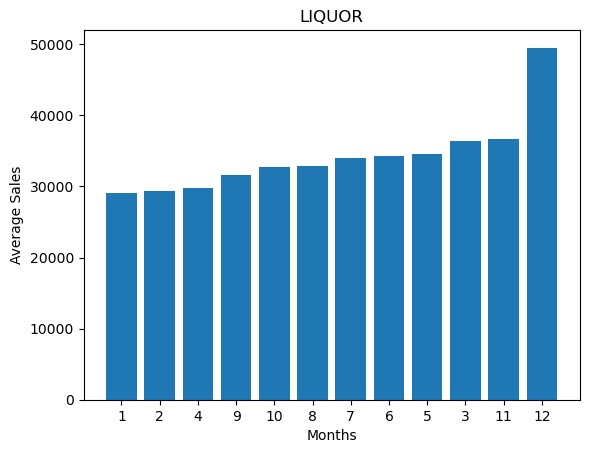

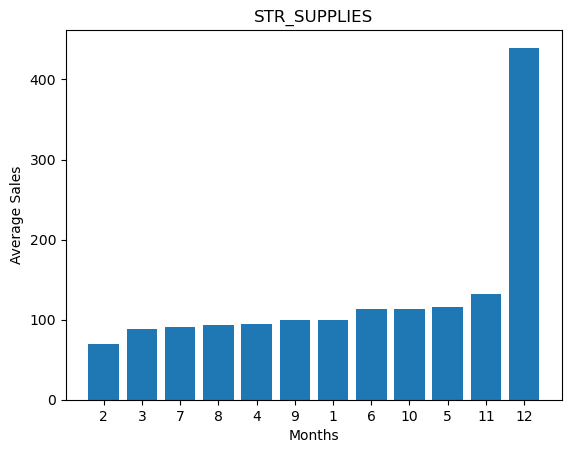

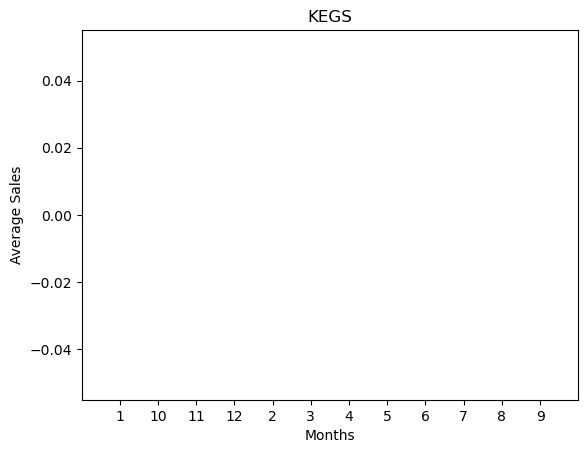

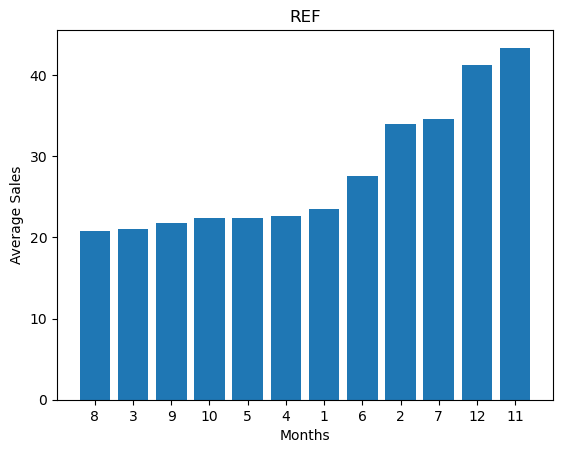

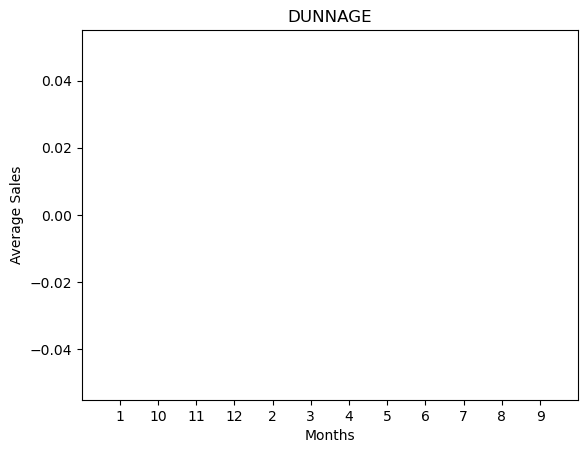

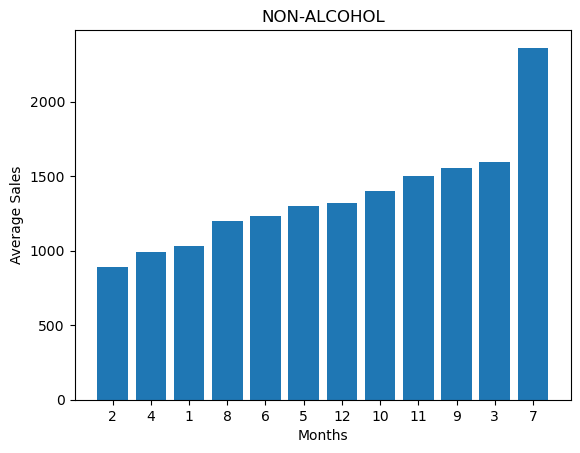

In [155]:
for item in items:
    
    sales = pd.read_csv('Warehouse_and_Retail_Sales.csv')

    dates = []

    wine = sales.loc[sales['ITEM TYPE'] == item]

    for row, i in wine.iterrows():
        date = f"{i['YEAR']}/{i['MONTH']}"

        dates.append(date)

    wine['Year - Month'] = dates

    wine['Datetime'] = pd.to_datetime(wine['Year - Month'])

    wine = wine.sort_values(by='Datetime')

    dates_ana = wine['Year - Month'].unique().tolist()

    sales = []

    for date in dates_ana:
        sales.append(wine.loc[wine['Year - Month'] == date]['RETAIL SALES'].sum())

    sales_df = pd.DataFrame({'Sales': sales, 'Dates': dates_ana})

    sales_df['Month'] = sales_df['Dates'].apply(lambda x: x.split('/')[1])

    group = sales_df.groupby(by='Month').mean()

    group = group.sort_values(by='Sales')

    # Create the plot with ax.plt()
    fig, ax = plt.subplots()
    ax.bar(group.index, group['Sales'])

    ax.set_xlabel('Months')
    ax.set_ylabel('Average Sales')

    ax.set_title(item)

    # Save the figure
    plt.savefig(f'{item}_Retail.png')